###Model1 


In our first model we are taking all 11 features to predict quality of our wine without considering correlations.

####importing data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
df=pd.read_csv("/content/winequality-red.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

####info of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


####statistical data of given dataset

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


####Checking for Null values

In [ ]:
df.isnull().sum() # we do not have any null values here.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

####Info about Quality


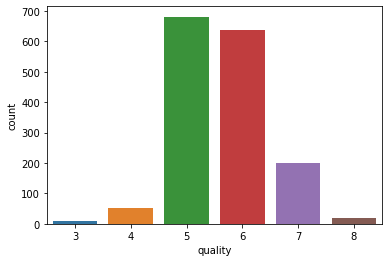

In [ ]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(x="quality",data=df)
plt.show()

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

####divide into input and output

In [ ]:
x=df.iloc[:,0:11].values # in first model we are taking all the features to predict quality
y=df.iloc[:,11].values 

####train and test variables

In [ ]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=0)

####run a regressor and fit the model

In [ ]:
from sklearn.linear_model import LinearRegression #taking linear regression as per requirement of given data
lin=LinearRegression()
lin.fit(trainx,trainy)  #training our model

LinearRegression()

####predicting the model

In [ ]:
predy=lin.predict(testx) #predicting our model

In [ ]:
print(predy)

[5.7829301  5.03619267 6.59698929 5.33912637 5.93952898 5.0072068
 5.39616171 6.05211188 4.86760343 4.95067572 5.28580441 5.41265269
 5.7057424  5.12921737 5.52885206 6.38052412 6.81012527 5.73803346
 5.97618825 5.08613415 6.34479863 5.16400983 5.64203971 6.1462903
 5.4817802  5.03391406 5.18721293 6.48783659 5.33301372 6.30458308
 6.03452293 5.82849303 5.58503524 5.28512701 5.75656128 6.15273792
 5.14134479 5.48228021 6.38983359 5.7901819  5.42936928 6.04810414
 6.70159678 6.60160183 5.97253803 4.78890763 5.49565005 6.01881894
 5.48895041 6.10824243 5.3126164  5.28492351 5.76043226 6.36081498
 5.7195388  5.26971928 5.08498332 5.31050693 6.50895816 5.44323413
 5.16377401 5.76427324 6.0703837  6.28933679 5.07315141 6.11874641
 5.35681067 6.01343647 6.12184268 5.98547673 5.35327968 5.4367731
 5.06017324 5.58939889 5.62593935 6.25651326 5.37875073 5.31024191
 5.72008022 6.30275434 5.71093253 5.27783285 5.89582077 6.0876033
 5.50616533 5.37465715 6.2437351  5.07332478 5.32665801 4.97398339

####finding mean absolute error 

In [ ]:
from sklearn.metrics import mean_absolute_error
a=mean_absolute_error(testy,predy)
print("Mean absolute error is:",a)

Mean absolute error is: 0.4696330928661096


####Finding mean squared error and root mean square error

In [ ]:
from sklearn.metrics import mean_squared_error
meansqerror=mean_squared_error(testy,predy) 
root_mean_squared_error=np.sqrt(meansqerror)
print("Mean squared error is :",meansqerror) 
print("Root mean squared error is :",root_mean_squared_error)

Mean squared error is : 0.38447119782012323
Root mean squared error is : 0.6200574149384259


###Model2

####Importing dataset again

In [ ]:
df1=pd.read_csv("/content/winequality-red.csv")
print(df1)

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.6

####Correlation between features and label

In [ ]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
correlations = df1.corr()['quality'].sort_values(ascending=False) #correlation of all features with label in highest to lowest
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


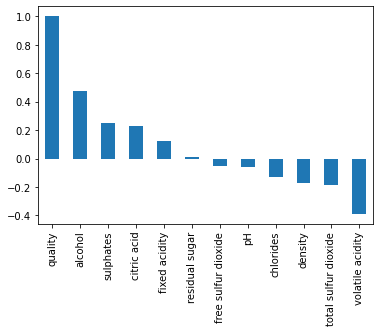

In [ ]:
correlations.plot(kind='bar') #bar graph for correlation of features and label.

Here we see the correlation between features and labels and also between features to features so to reduce multicollinearity we will choose most correlated features to label which are not very much related to one another.

####Selecting features

In [ ]:
correlations[abs(correlations) > 0.18] #we considering features having corr with quality more than 0.18

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

####Divide into input and output

In [ ]:
x1=df.iloc[:,[1,2,6,9,10]].values #taking the values highly correlated to label
y1=df.iloc[:,11].values

####Train and test variable

In [ ]:
from sklearn.model_selection import train_test_split
trainx1,testx1,trainy1,testy1=train_test_split(x1,y1,test_size=0.2,random_state=0)

####Run a regressor and fit the model

In [ ]:
from sklearn.linear_model import LinearRegression
lin1=LinearRegression()
lin1.fit(trainx1,trainy1)

LinearRegression()

####Predicting the model

In [ ]:
predy1=lin1.predict(testx1)

####Finding the mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error
a1=mean_absolute_error(testy1,predy1)
print("Mean absolute error is:",a1)

Mean absolute error is: 0.47537977403576387


####Finding mean squared error and root mean square error

In [ ]:
from sklearn.metrics import mean_squared_error
meansqerror1=mean_squared_error(testy1,predy1) 
root_mean_squared_error1=np.sqrt(meansqerror1)
print("Mean squared error is :",meansqerror1) 
print("Root mean squared error is :",root_mean_squared_error1)

Mean squared error is : 0.3943875351271343
Root mean squared error is : 0.6280028145853602


###Comparing both models

In [ ]:
print("For model1:")
print("Mean absolute error is:",a)
print("Mean squared error is :",meansqerror) 
print("Root mean squared error is :",root_mean_squared_error,)
print("\n")
print("For model2")
print("Mean absolute error is:",a1)
print("Mean squared error is :",meansqerror1) 
print("Root mean squared error is :",root_mean_squared_error1)


For model1:
Mean absolute error is: 0.4696330928661096
Mean squared error is : 0.38447119782012323
Root mean squared error is : 0.6200574149384259


For model2
Mean absolute error is: 0.47537977403576387
Mean squared error is : 0.3943875351271343
Root mean squared error is : 0.6280028145853602


So by comparing mean_absolute_error and mean_squared_error of both models we get to know that our model1 is more efficient than model2 despite of correlations. so we could use all features at same time to predict quality of wine.

In [ ]:
#a is mean absoute error of model1
#a1 is mean absolute error of model2
k=max(a,a1)
print("greater mean absolute error is :",k)

greater mean absolute error is : 0.47537977403576387


Conclusion-Model1 is more efficient than Model2 in predicting quality of wine.